In [ ]:
pip install networkx>=2.0

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the csv data frame

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train_details_22122017india.csv to Train_details_22122017india.csv


In [ ]:
# data = pd.read_csv(io.BytesIO(uploaded['Train_details_22122017.csv']), sep = ';')
path = 'Train_details_22122017india.csv'
data = pd.read_csv(path)


In [ ]:
data #viewing the dataset

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Departure Time,Time Spent,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,0:00:00,10:25:00,10:25:00,0.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,11:08:00,0:02:00,32.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,11:30:00,0:02:00,49.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,0:00:00,11:50:00,78.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,0:00:00,20:30:00,20:30:00,0.0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186111,99908,EMU,8,AKRD,AKURDI,23:30:00,23:31:00,0:01:00,19.0,PUNE,PUNE JN.,TGN,TALEGAON
186112,99908,EMU,9,DEHR,DEHU ROAD,23:35:00,23:36:00,0:01:00,24.0,PUNE,PUNE JN.,TGN,TALEGAON
186113,99908,EMU,10,BGWI,BEGDAEWAI,23:39:00,23:40:00,0:01:00,28.0,PUNE,PUNE JN.,TGN,TALEGAON
186114,99908,EMU,11,GRWD,GHORAWADI,23:41:00,23:42:00,0:01:00,31.0,PUNE,PUNE JN.,TGN,TALEGAON


In [ ]:
print(data['Distance'].apply(type))

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
186111    <class 'float'>
186112    <class 'float'>
186113    <class 'float'>
186114    <class 'float'>
186115    <class 'float'>
Name: Distance, Length: 186116, dtype: object


In [ ]:
data['Distance'] = data['Distance'].astype('float')


Plotting the graph to visualize it

   Train No    Train Name  ...  Destination Station Destination Station Name
0       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
1       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
2       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
3       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
4       108  VLNK-MAO-SWV  ...                  SWV          SAWANTWADI ROAD

[5 rows x 13 columns]
Index(['Train No', 'Train Name', 'SEQ', 'Station Code', 'Station Name',
       'Arrival time', 'Departure Time', 'Time Spent', 'Distance',
       'Source Station', 'Source Station Name', 'Destination Station',
       'Destination Station Name'],
      dtype='object')


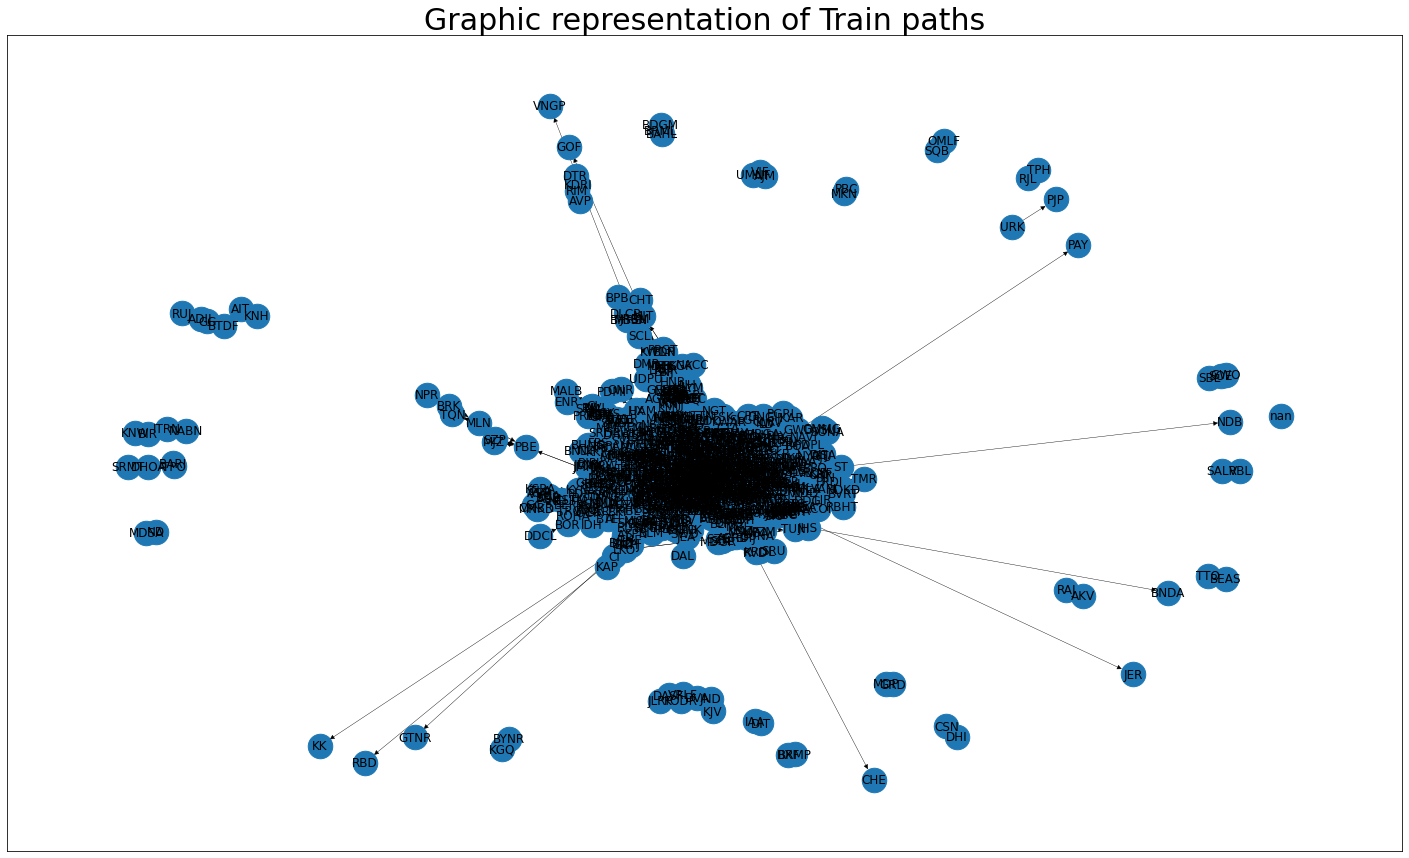

In [ ]:
print(data.head()) # to see first rows of the dataframe
print(data.columns) # to see all column titles of the dataframe

G = nx.from_pandas_edgelist(data, source='Source Station', target='Destination Station', edge_attr=True, create_using=nx.DiGraph)

plt.figure(figsize=(25, 15))
nx.draw_networkx(G, with_labels=True, alpha=1,width=.4, node_size=600)
plt.title('Graphic representation of Train paths', size=30)
plt.show()

# Shortest path between Source and Target

In [ ]:
# Dataset is now stored in a Pandas Dataframe
def find_path(G, source , destiny):
 return nx.shortest_path(G, source=source, target=target)

   Train No    Train Name  ...  Destination Station Destination Station Name
0       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
1       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
2       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
3       107  SWV-MAO-VLNK  ...                  MAO              MADGOAN JN.
4       108  VLNK-MAO-SWV  ...                  SWV          SAWANTWADI ROAD

[5 rows x 13 columns]

origin :
PUNE
destiny :
SWV


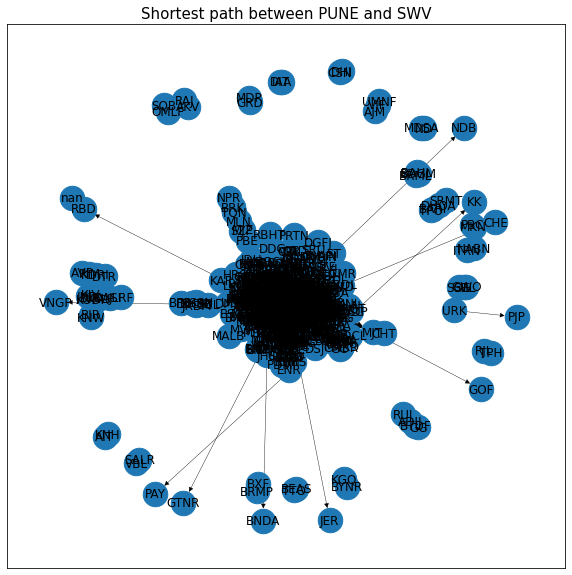

['PUNE', 'NZM', 'MAO', 'SWV']


In [ ]:
print(data.head()) # to see first rows of the dataframe
# print(data.columns) # to see all column titles of the dataframe
print("\norigin :")
source=input()

print("destiny :")
target=input()

plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, alpha=1,width=.4, node_size=600)
plt.title('Shortest path between ' + source + ' and '+ target, size=15)
plt.show()

shortest_path= find_path(G,source,target)
print(shortest_path)

# Create a graph from 'sp'
pathGraph = nx.path_graph(shortest_path)  # does not pass edges attributes

### Degree Connectivity

In [ ]:
def degree_connectivity(path):
    total_degree = 0
    print('Path: ' + str(path) + ':\n')
    for i in range(0, len(path)):
        total_degree += G.degree(path[i])
        print("Degree Connectivity of " + path[i] + " (Sum of In and Out flow): " + str(G.degree(path[i]))) 
        print("Inflow Centrality of " + path[i] + " : " + str(G.in_degree(path[i]))) 
        print("Outflow Centrality of " + path[i] + " : " + str(G.out_degree(path[i])))
        print('\n')
    print("Total DC: ")
    return total_degree

In [ ]:
print(str(shortest_path) + '\n')

degree_connectivity(shortest_path)

['MAO', 'NZM', 'SC', 'PBR']

Path: ['MAO', 'NZM', 'SC', 'PBR']:

Degree Connectivity of MAO (Sum of In and Out flow): 21
Inflow Centrality of MAO : 10
Outflow Centrality of MAO : 11


Degree Connectivity of NZM (Sum of In and Out flow): 80
Inflow Centrality of NZM : 39
Outflow Centrality of NZM : 41


Degree Connectivity of SC (Sum of In and Out flow): 82
Inflow Centrality of SC : 40
Outflow Centrality of SC : 42


Degree Connectivity of PBR (Sum of In and Out flow): 22
Inflow Centrality of PBR : 11
Outflow Centrality of PBR : 11


Total DC: 


205

### Shortestpath to retrieve the path from source to target with Distance

In [ ]:
import io
def find_path(G, origin , destiny, distance):
 return nx.shortest_path(G, source=origin, target=destiny, weight=distance)

In [ ]:
distance = [float("Inf")]
shortest_path_Dis=find_path(G,'PUNE','SWV','Distance')
print(shortest_path_Dis)

['PUNE', 'KJT', 'KYN', 'DR', 'SWV']


### Closeness Centrality

In [ ]:
print(len(G.nodes())) # getting the leng of nodes in G

938


In [ ]:
import io
def find_path(G, origin , destiny, distance):
 return nx.shortest_path(G, source=origin, target=destiny, weight=distance)

In [ ]:
def closeness_centrality(path, weight):
  for source in shortest_path:  
    avrg=0
    for node in list(G.nodes()): #all nodes
      current_path = nx.shortest_path(G, source=source, target=target, weight=weight)
      avrg += + len(current_path) - 1
    print('Average length of the shortestpath of ' + source + ": " + str(avrg/(len(G.nodes())-1)))

In [ ]:
closeness_centrality(shortest_path_Dis, 'Distance')

Average length of the shortestpath of MAO: 11.011739594450374
Average length of the shortestpath of NZM: 6.006403415154749
Average length of the shortestpath of SC: 1.0010672358591248
Average length of the shortestpath of PBR: 0.0


# Network Density

In [ ]:
def network_density(G):
    """
    Compute the network density
    """
    if isinstance(G, nx.Graph):
        n_vert = len(G.nodes)
        n_edges = len(G.edges)
        return (n_edges) / (n_vert * (n_vert - 1))
    elif isinstance(G, nx.DiGraph):
        n_vert = len(G.nodes)
        n_edges = len(G.edges)
        return (2 * n_edges) / (n_vert * (n_vert - 1))
    else:
        raise TypeError("check type of G")


In [ ]:
print(f" * network density:              {network_density(G):.3f}")

 * network density:              0.006


### Depths-First Search and Breadth-First Search

In [ ]:
def attribute_for_nodes(G, attribute, default_value):
    """
    Create an attribute for every node in G and set it with default value;
    If called again, reset all nodes’ attribute to default value
    """
    for g in G.nodes.keys():
        G.nodes[g][attribute] = default_value

In [ ]:
# add 'visited' attribute to each node
attribute_for_nodes(G, 'visited', False)

**DFS**

In [ ]:
  def any_path(G, origin, destination):
    """
    Finds any path from origin to destination (strings)
    Returns a list of node labels from origin to destination
    """
    path = []
    
    def dfs_path(G, orig, dest, path):
        """
        Depth-first search to find a path
        """
        
        
        G.nodes[orig]['visited'] = True

        for neighbor in G.neighbors(orig):

            if G.nodes[neighbor]['visited']:
                continue

            if neighbor == dest:
                G.nodes[neighbor]['visited'] = True
                path.append(neighbor)
                return
            
            dfs_path(G, neighbor, dest, path)
            if G.nodes[dest]['visited']:
                path.append(neighbor)
                return

    dfs_path(G, origin, destination, path)
    return [origin] + path[::-1]


In [ ]:
origin, destination = 'MAO', 'PBR'
path = any_path(G, origin, destination)

print("origin-where it starts:", origin)
print("destination-where it finishes:", destination)
print("path:", " -> ".join(path))

origin-where it starts: MAO
destination-where it finishes: PBR
path: MAO -> SWV -> LTT -> KRMI -> AJNI -> AMI -> PUNE -> MAJN -> KCVL -> CDG -> NDLS -> BCT -> ADI -> KOP -> CSMT -> NGP -> JP -> HYB -> RXL -> HWH -> RNC -> ANVT -> JSME -> KOAA -> PURI -> SRC -> JBP -> BDTS -> NZM -> KOTA -> PNBE -> BTI -> JAT -> PTK -> DLI -> SVDK -> LKO -> YPR -> PVR -> SNSI -> DR -> PDY -> BBS -> MAS -> QLN -> MS -> TEN -> ED -> MTDM -> SA -> KRR -> TPJ -> MV -> CBE -> CGL -> MDU -> DDN -> DEE -> INDB -> GWL -> BSB -> SDAH -> NJP -> KNE -> AII -> AF -> RMR -> HW -> BKN -> DDR -> BHUJ -> BE -> PRG -> CNB -> KGM -> JSM -> LGH -> ABS -> JU -> BME -> KLK -> UMB -> SRE -> ALD -> BST -> GKP -> TVC -> SCL -> GHY -> JTTN -> TSK -> LMG -> APDJ -> SGUJ -> KIR -> JYG -> RJPB -> BAKA -> BGP -> DNR -> SBC -> UBL -> BJP -> SUR -> MRJ -> PRLI -> PAU -> ADB -> TPTY -> VSKP -> SC -> DBG -> ASR -> SHC -> JMP -> MLDT -> DGHA -> ASN -> DHN -> TATA -> KCG -> COA -> BZA -> BNC -> KYQ -> MZS -> RNY -> DBRG -> CAPE -> RMM ->

#BFS

In [ ]:
'''
convert graph to dictioinary
keys are the nodes
values are dictionaries consisting from the neigbours and the weights betweeen node and its neigbour
'''
def convertGraphToDictionary(G, attr):
  list_of_nodes=G.nodes()  
  graph={}
  for node in list_of_nodes:
    list_of_neighbors=list(G.neighbors(node))
    dictionary={}
    for l in list_of_neighbors:
      dictionary[l]=G.edges[node, l][attr]
    graph[node]=dictionary
  return graph

In [ ]:
def bfs_shortest_path(graph, start, goal):
  # explored nodes
  explored = []
  # all the paths to be checked
  queue = [[start]]

  # return path if start is goal
  if start == goal:
    return "Start = goal"

  # while queue is not empty
  while queue:
    # pop the first element from the queue
    path = queue.pop(0)
    # get the last node from the path
    node = path[-1]
    # if node is not in the explored ones
    if node not in explored:
      # get the neigbours of the node
      neighbours = graph[node]
      # go through all neighbour nodes
      for neighbour in neighbours:
        # construct a new path
        new_path = list(path)
        new_path.append(neighbour)
        # add it into the queue
        queue.append(new_path)
        # return path if neighbour is goal
        if neighbour == goal:
          return new_path

      # mark node as explored
      explored.append(node)

In [ ]:
dictionary=convertGraphToDictionary(G, 'Distance')
#print("Bellman-Ford: ",bellman_ford(dictionary, 'MAO', 'PBR'))  #i ve commentedd this bc it gives error: unsupported operand type(s) for +: 'float' and 'str'

print("BFS: ", bfs_shortest_path(dictionary, 'MAO', 'PBR'))

BFS:  ['MAO', 'NZM', 'SC', 'PBR']


# Bellman-Ford

In [ ]:
def get_shortest_path_from_pred(pred, source, dest):
    """
    Get shortest path from predecessor list
    """

    sp = []
    cur_node = dest

    while cur_node != source:
        sp.append(cur_node)
        cur_node = pred[cur_node]

    sp.append(source)

    return list(reversed(sp))

In [ ]:
def bellman_ford(G, source, attr):
    """
    Bellman-Ford algorithm. Returns 2 dicts: distances and predecessors

  returns path between source and dest and the cost of this path
  dictionary consists of the nodes of the graph as keys and distances from the source node to each node of the graph as values
  predecessor is the graph in which nodes of graph are keys and nodes from which we reach them are values
  the source node doesn't have the predecessor since it is considered as the root
  graph: dictionary of nodes and its neighbours with weights
"""

    dist = {}
    pred = {}

    for n in G.nodes:
        dist[n] = float('inf')
        pred[n] = None

    dist[source] = 0
# for each edge for the given node
      # initialise weight to the sum of current_weight plus the distance of the edge
       # if edge is not in visited or weight is less than number of visiting edge
        # assign the number of visiting the edge to the weight
        #  then assign to the node as value

    # relax edges, 
    for _ in range(len(G.nodes) - 1):
        for u, v, data in G.edges(data=True):
            w = float(data[attr])
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                pred[v] = u

    # check for negative weight cycles
    for u, v, data in G.edges(data=True):
        w = data[attr]
           # if greater, then the distance from source to neighbour is the distance from source to node plus distance from node to neighbour
          # the predecessor of the neighbour is the node itself
        if dist[u] + w < dist[v]:
            raise AssertionError("Graph contains a negative weight cycle")

    return dist, pred


In [ ]:
dist, pred = bellman_ford(G, 'MAO', attr='Distance')
sp = get_shortest_path_from_pred(pred, 'MAO', 'PBR')
print("MOA -> PBR shortest path by distance:", dist['PBR'], sp)

MOA -> PBR shortest path by distance: 1889.0 ['MAO', 'SWV', 'DIVA', 'PNVL', 'DRD', 'VR', 'ST', 'BRC', 'ANND', 'ADI', 'SMNH', 'PBR']


MAO -> CRP shortest path by distance: 1889.0 ['MAO', 'SWV', 'DIVA', 'PNVL', 'DRD', 'VR', 'ST', 'BRC', 'ANND', 'ADI', 'SMNH', 'PBR']


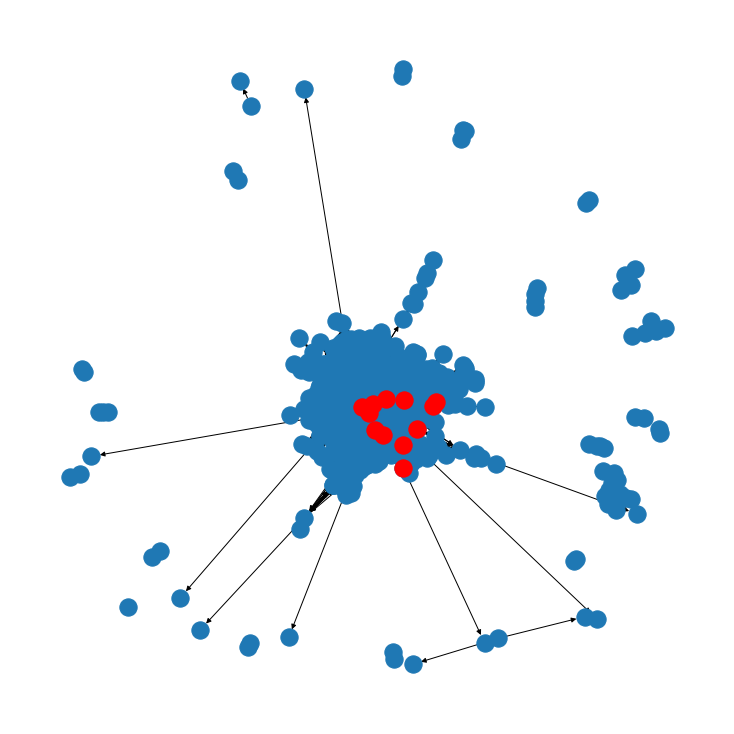

In [ ]:
dist, pred = bellman_ford(G, 'MAO', attr='Distance')
path = get_shortest_path_from_pred(pred, 'MAO', 'PBR')  #finds shorts path between given stations
print("MAO -> PBR shortest path by distance:", dist['PBR'], sp)
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw(G,pos)
# draw path in red
path_edges = zip(path,path[1:])
path_edges = set(path_edges)
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=.4,node_size=600)
plt.show()


In [ ]:

def edmonds_karp(G, source, sink, attr):
    """
    Ford-Fulkerson algorithm, attr: capacity
    """

    R = nx.algorithms.flow.edmonds_karp(G, source, sink, capacity=attr)

    mf = R.graph['flow_value']

    return mf

In [ ]:
# max_flow = edmonds_karp(G, 'MAO', 'PBR', attr='Kbps_AVG')

# print("Max flow:", max_flow)

### Dijkstra's algorithm

In [ ]:
def dijkstra(G, source, attr):
    """
    Dijkstra's algorithm
  dijkstra returns path between source and dest nodes and cost of this path
  visited is dictionary in which nodes are the keys and the weights of visiting node is the value
  predecessors is dictionary of predecessor for each node
  graph: is netwrokx.Graph
    """

    dist = {}
    pred = {}
    for n in G.nodes:
        dist[n] = float('inf')
        pred[n] = None
    dist[source] = 0
    # for each edge for the given node
      # initialise weight to the sum of current_weight plus the distance of the edge
       # if edge is not in visited or weight is less than number of visiting edge
        # assign the number of visiting the edge to the weight
        #  then assign to the node as value

    # relax edges
    for _ in range(len(G.nodes) - 1):
        for u, v, data in G.edges(data=True):
            w = data[attr]
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                pred[v] = u
    # check for negative weight cycles
    for u, v, data in G.edges(data=True):
        w = data[attr]
             # if greater, then the distance from source to neighbour is the distance from source to node plus distance from node to neighbour
          # the predecessor of the neighbour is the node itself
        if dist[u] + w < dist[v]:
            raise AssertionError("Graph contains a negative weight cycle")
    return dist, pred

In [ ]:
dist, pred = dijkstra(G, 'MAO', attr='Distance')
sp = get_shortest_path_from_pred(pred, 'MAO', 'PBR')
print("MAO -> PBR shortest path by distance using dijkstra:", dist['PBR'], sp)

MAO -> PBR shortest path by distance using dijkstra: 1889.0 ['MAO', 'SWV', 'DIVA', 'PNVL', 'DRD', 'VR', 'ST', 'BRC', 'ANND', 'ADI', 'SMNH', 'PBR']


MOA -> PBR shortest path by distance: 1889.0 ['MAO', 'SWV', 'DIVA', 'PNVL', 'DRD', 'VR', 'ST', 'BRC', 'ANND', 'ADI', 'SMNH', 'PBR']


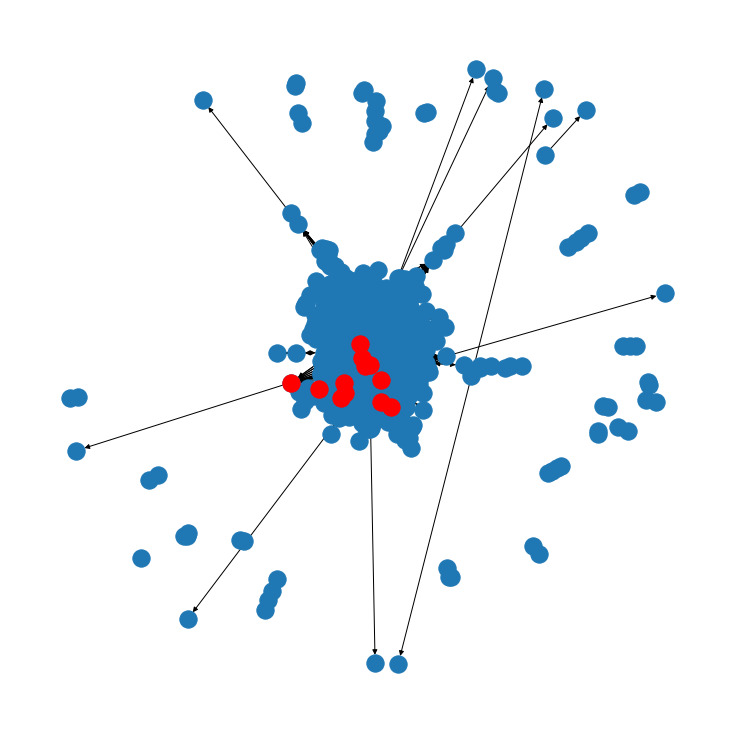

In [ ]:
dist, pred = bellman_ford(G, 'MAO', attr='Distance')
path = get_shortest_path_from_pred(pred, 'MAO', 'PBR')
print("MOA -> PBR shortest path by distance:", dist['PBR'], sp)
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw(G,pos)
# draw path in red
path_edges = zip(path,path[1:])
path_edges = set(path_edges)
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=.4,node_size=600)
plt.show() 